## Import  <a class="anchor"  id="chapter1"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

## Exploring dataset <a class="anchor"  id="chapter2"></a>

In [3]:
train.head()
#type(train)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58



## Pre-processing  <a class="anchor"  id="chapter3"></a>

In [8]:
#removing irrelevant columns
#these columns just for indexing not useful for training
df=train.drop(['id','CustomerId','Surname'],axis=1)
df_test=test.drop(['id','CustomerId','Surname'],axis=1)

(array([130113.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  34921.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

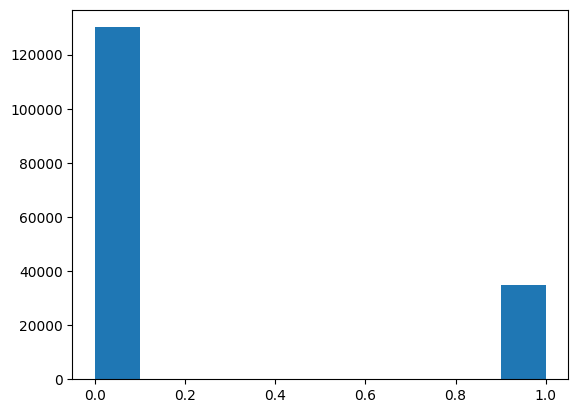

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x='Exited',data=df)

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

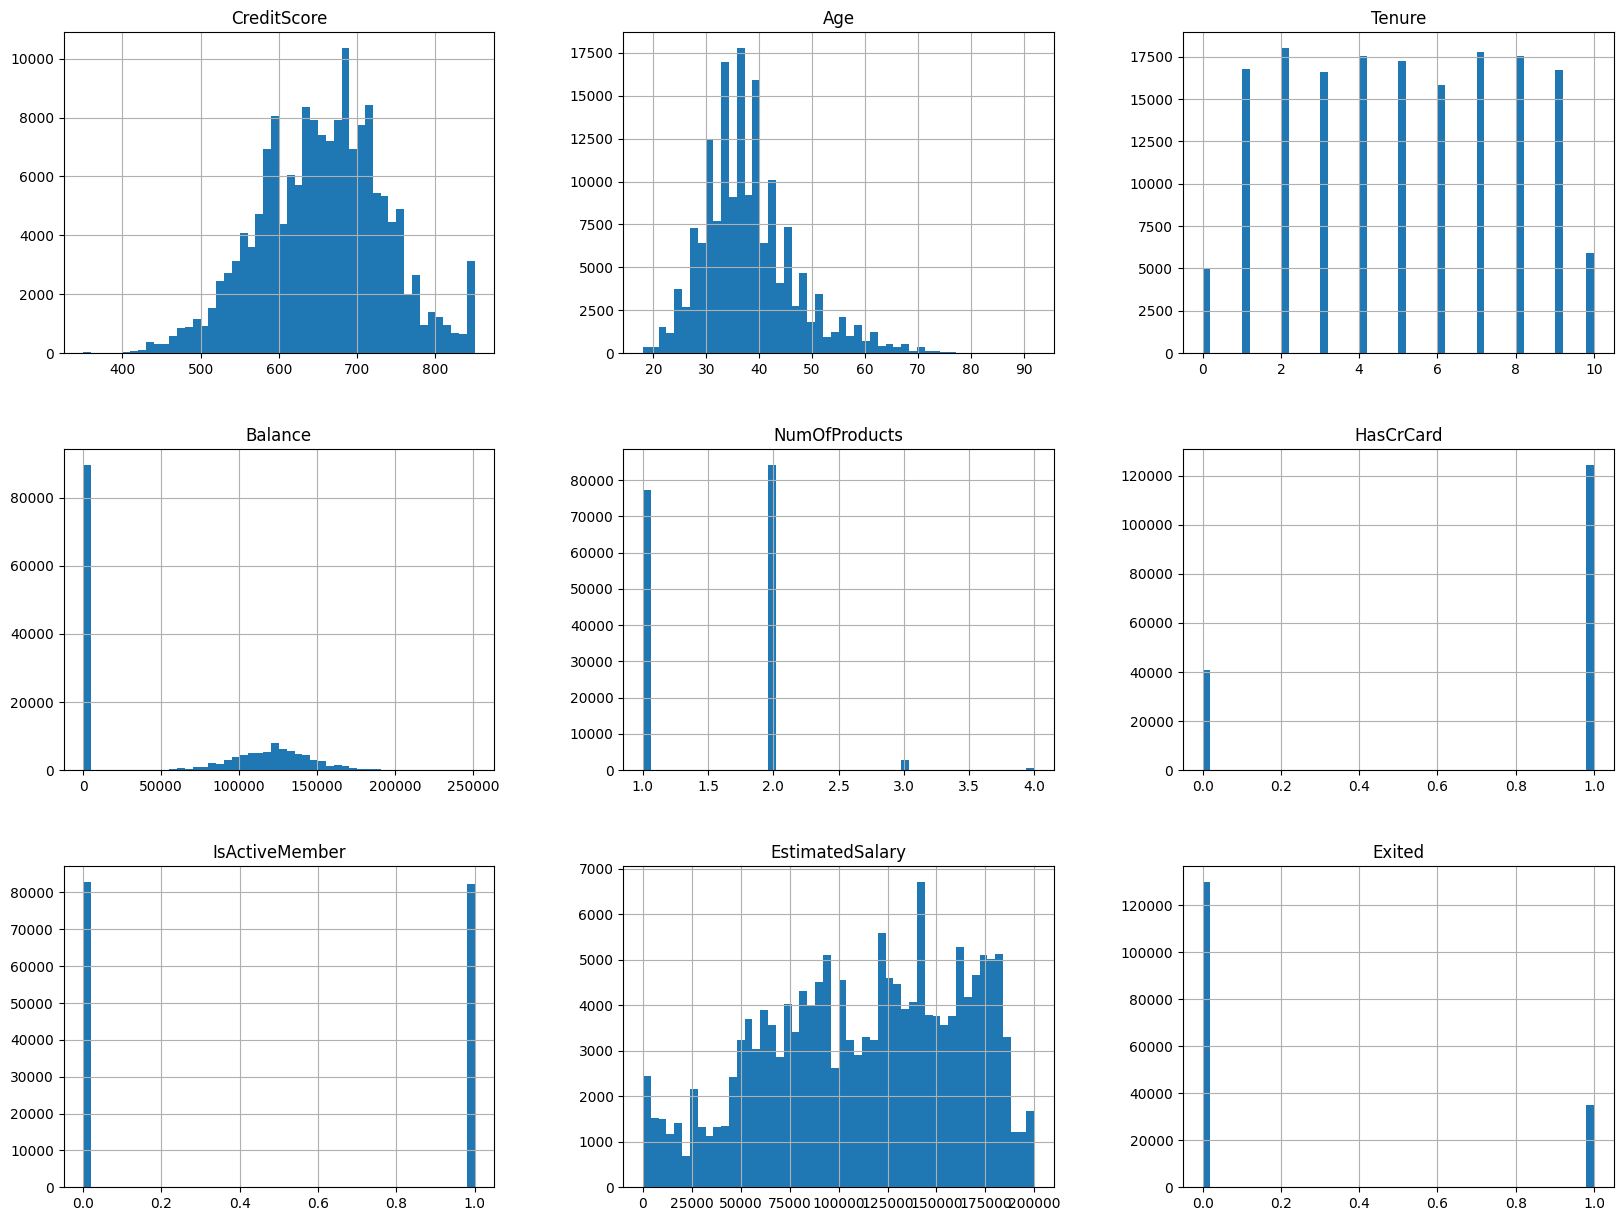

In [10]:
df.hist(bins=50,figsize=[20,15])

In [11]:
#changing imbalanced to balanced dataset
from imblearn.over_sampling import RandomOverSampler
x=df.drop('Exited',axis=1)
y=df['Exited']

ros=RandomOverSampler(random_state=42)

x_resampled,y_resampled=ros.fit_resample(x,y)
# resampled_df=pd.concat()
resampled_df=pd.concat([pd.DataFrame(x_resampled),pd.Series(y_resampled,name='Exited')],axis=1)

In [12]:
resampled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


(array([130113.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 130113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

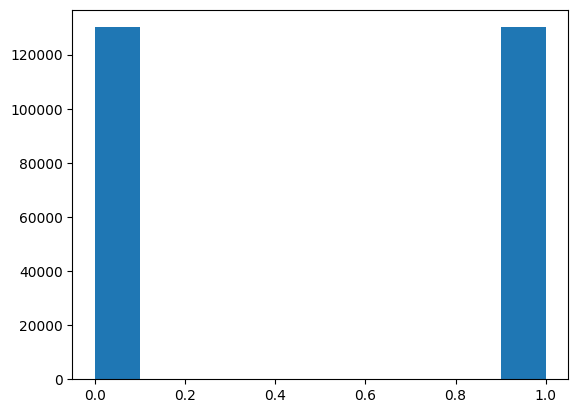

In [13]:
plt.hist(x='Exited',data=resampled_df)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [15]:
#sklearn
from sklearn.preprocessing import LabelEncoder
labEn=LabelEncoder()
resampled_df['Geography'] = labEn.fit_transform(resampled_df['Geography'])
resampled_df['Gender'] = labEn.fit_transform(resampled_df['Gender'])

df_test['Geography'] = labEn.fit_transform(df_test['Geography'])
df_test['Gender'] = labEn.fit_transform(df_test['Gender'])

In [16]:
resampled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [17]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [18]:
resampled_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [19]:
train_x=resampled_df.drop('Exited',axis=1)
train_y=resampled_df['Exited']

In [20]:
test_x=df_test

In [21]:
corr=resampled_df.corr()
corr['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.396172
Balance            0.159417
Geography          0.066194
EstimatedSalary    0.023731
Tenure            -0.024429
HasCrCard         -0.025477
CreditScore       -0.035498
Gender            -0.176621
NumOfProducts     -0.239055
IsActiveMember    -0.260164
Name: Exited, dtype: float64

<Axes: >

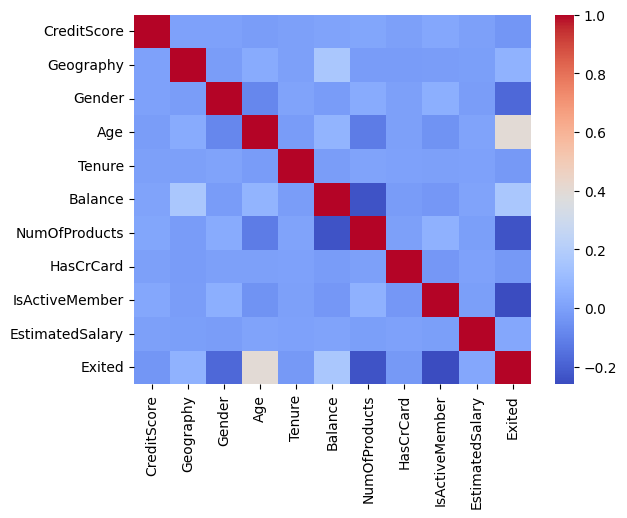

In [22]:
import seaborn as sns
sns.heatmap(resampled_df.corr(),annot=False,cmap='coolwarm')

<Axes: >

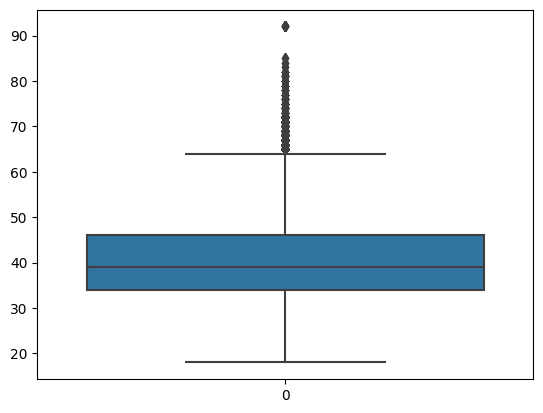

In [23]:
sns.boxplot(resampled_df['Age']) #for outliers in age

In [24]:
from scipy import stats
features=["CreditScore","Balance","EstimatedSalary"]
z_score=np.abs(stats.zscore(resampled_df[features]))
threshold=3
outlier_indices=np.where(z_score>threshold)[0]
print(len(outlier_indices))

208


In [25]:
z_score.head()
z_score.iloc[outlier_indices[2]] #just checking

CreditScore        3.573121
Balance            0.510481
EstimatedSalary    1.102356
Name: 2037, dtype: float64

In [26]:
train_x= train_x[(z_score<threshold).all(axis=1)].reset_index(drop= True)
train_y= train_y[(z_score<threshold).all(axis=1)].reset_index(drop= True)

In [27]:
test_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [28]:
train_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.33,random_state=42)
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
df_test.head()
#df_test=df_test.drop('Exited',axis=1)
# test_y=test_x['Exited']
# test_x=test_x.drop('Exited',axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [31]:
scaled=scaler.transform(test_x)

In [32]:
test_x_scaled=pd.DataFrame(scaled,columns=test_x.columns)
test_x_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.394495,0.0,0.0,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903
1,0.616972,0.0,0.0,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723
2,0.555046,0.0,0.0,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419
3,0.612385,0.0,1.0,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654
4,0.775229,0.5,1.0,0.270270,1.0,0.508683,0.000000,1.0,0.0,0.697164


In [33]:
#scaler.fit(df_test)
# scaled=scaler.transform(df_test)
# test_x_scaled=pd.DataFrame(scaled,columns=df_test.columns)

## Model  <a class="anchor"  id="chapter4"></a>

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc

model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred_prob=model.predict_proba(x_test)[:,1]

In [35]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     42759
           1       0.90      0.97      0.94     43047

    accuracy                           0.93     85806
   macro avg       0.94      0.93      0.93     85806
weighted avg       0.94      0.93      0.93     85806

[[38230  4529]
 [ 1127 41920]]


AUC:  0.9846475581574041 



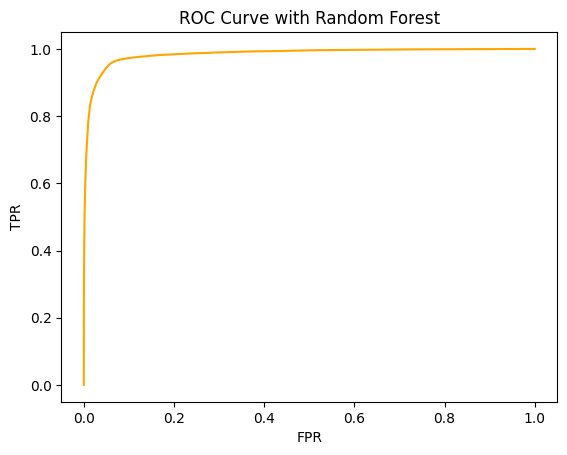

In [36]:
fpr_rnd_forest, tpr_rnd_forest, thresholds = roc_curve(y_test,pred_prob)
plt.plot(fpr_rnd_forest,tpr_rnd_forest,color='orange');
plt.title('ROC Curve with Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('AUC: ',auc(fpr_rnd_forest,tpr_rnd_forest),'\n')

In [37]:
pred_prob= model.predict_proba(test_x_scaled)[:,1]
pred_prob

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0.05, 0.95, 0.  , ..., 0.  , 0.18, 0.27])

In [38]:
test_x_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.394495,0.0,0.0,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903
1,0.616972,0.0,0.0,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723
2,0.555046,0.0,0.0,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419
3,0.612385,0.0,1.0,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654
4,0.775229,0.5,1.0,0.270270,1.0,0.508683,0.000000,1.0,0.0,0.697164
...,...,...,...,...,...,...,...,...,...,...
110018,0.357798,1.0,1.0,0.148649,0.7,0.487021,0.000000,1.0,1.0,0.740451
110019,0.369266,0.0,0.0,0.243243,0.4,0.746820,0.000000,1.0,1.0,0.210871
110020,0.683486,0.0,1.0,0.175676,0.2,0.000000,0.333333,1.0,0.0,0.081387
110021,0.676606,0.0,0.0,0.189189,0.3,0.000000,0.000000,1.0,1.0,0.794101


In [39]:
pred_prob= pd.Series(pred_prob)
submission_df= pd.DataFrame({'id': test['id'], 'Exited': pred_prob})
submission_df.head()

,id,Exited
0,165034,0.05
1,165035,0.95
2,165036,0.00
3,165037,0.29
4,165038,0.39


In [40]:
submission_df.to_csv("submission.csv", index=False)

**Finish**